<a href="https://colab.research.google.com/github/eteh1/Evolution-of-point-bars-along-the-Niger-River-in-the-Niger-Delta-Nigeria-using-machine-learning/blob/main/point_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

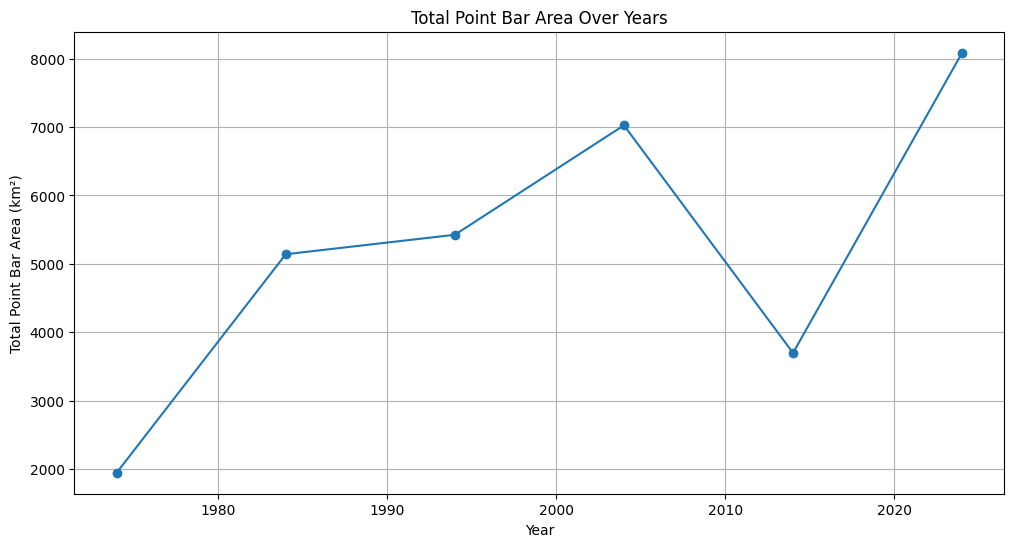

ADF Statistic: -2.7274109022023345
p-value: 0.06941390291930598
                                   SARIMAX Results                                   
Dep. Variable:     Total Point Bar Area Diff   No. Observations:                    5
Model:                        ARIMA(1, 1, 1)   Log Likelihood                 -36.784
Date:                       Mon, 17 Jun 2024   AIC                             79.567
Time:                               04:39:15   BIC                             77.726
Sample:                                    0   HQIC                            75.527
                                         - 5                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      1.380     -0.725      0.469      -3.705       1.705
ma.L1      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Data preparation
data = {
    "Year": [1974, 1984, 1994, 2004, 2014, 2024],
    "River Area (km²)": [46376.54, 42711.05, 48506.25, 46008.32, 49601.2, 44796.47],
    "Mini Point Bar (km²)": [2.38, 44.78, 15.56, 2.07, 133.54, 2.38],
    "Maxi Point Bar (km²)": [1582.82, 2025.44, 2273.85, 1932.59, 1784.12, 783.84],
    "Mean Point Bar (km²)": [227.95, 734.43, 775.08, 780.7, 616.2, 622.15],
    "Standard Deviation (SD) (km²)": [587.32, 675.09, 810.5, 669.47, 680.2, 783.84],
    "Total Point Bar Area (km²)": [1945.63, 5141, 5425.59, 7026.33, 3697.19, 8087.89]
}

df = pd.DataFrame(data)

# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Total Point Bar Area (km²)'], marker='o')
plt.title('Total Point Bar Area Over Years')
plt.xlabel('Year')
plt.ylabel('Total Point Bar Area (km²)')
plt.grid(True)
plt.show()

# Check for stationarity
result = adfuller(df['Total Point Bar Area (km²)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the p-value > 0.05, the series is non-stationary and we need to difference it
df['Total Point Bar Area Diff'] = df['Total Point Bar Area (km²)'].diff().dropna()

# Model Identification
model = ARIMA(df['Total Point Bar Area Diff'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

# Model Summary
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=5)
print('Forecast:', forecast)


Coefficients: [-75.3646]
Mean squared error: 26574741.58129289
Coefficient of determination (R^2 score): -6.911611686812735


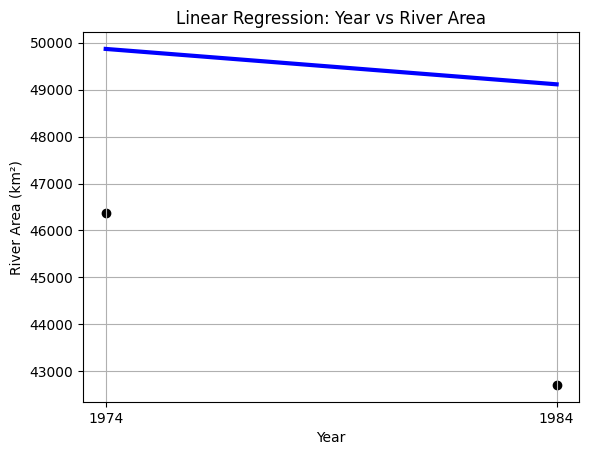

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data provided
data = {
    'Year': [1974, 1984, 1994, 2004, 2014, 2024],
    'River Area (km²)': [46376.54, 42711.05, 48506.25, 46008.32, 49601.2, 44796.47],
    'Mini Point Bar (km²)': [2.38, 44.78, 15.56, 2.07, 133.54, 2.38],
    'Maxi Point Bar (km²)': [1582.82, 2025.44, 2273.85, 1932.59, 1784.12, 783.84],
    'Mean Point Bar (km²)': [227.95, 734.43, 775.08, 780.7, 616.2, 622.15],
    'Standard Deviation (SD) (km²)': [587.32, 675.09, 810.5, 669.47, 680.2, 783.84],
    'Total Point Bar Area (km²)': [1945.63, 5141, 5425.59, 7026.33, 3697.19, 8087.89]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Example: Linear Regression on 'Year' vs 'River Area (km²)'
X = df[['Year']]
y = df['River Area (km²)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
print('Coefficients:', model.coef_)
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2 score):', r2_score(y_test, y_pred))

# Plot results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('River Area (km²)')
plt.title('Linear Regression: Year vs River Area')
plt.xticks(X_test['Year'])
plt.grid(True)
plt.show()


Mean Squared Error: 19137200.34
R^2 Score: -6.50


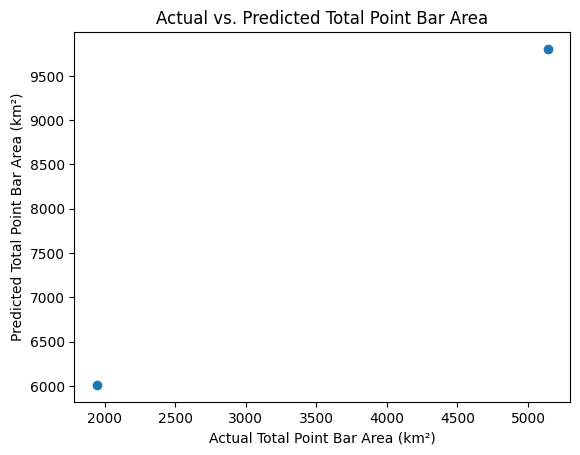

In [ ]:
import pandas as pd

# Define the data
data = {
    'Year': [1974, 1984, 1994, 2004, 2014, 2024],
    'River Area (km²)': [46376.54, 42711.05, 48506.25, 46008.32, 49601.2, 44796.47],
    'Mini Point Bar (km²)': [2.38, 44.78, 15.56, 2.07, 133.54, 2.38],
    'Maxi Point Bar (km²)': [1582.82, 2025.44, 2273.85, 1932.59, 1784.12, 783.84],
    'Mean Point Bar (km²)': [227.95, 734.43, 775.08, 780.7, 616.2, 622.15],
    'Standard Deviation (SD) (km²)': [587.32, 675.09, 810.5, 669.47, 680.2, 783.84],
    'Total Point Bar Area (km²)': [1945.63, 5141, 5425.59, 7026.33, 3697.19, 8087.89]
}

# Create a DataFrame
df = pd.DataFrame(data)
# Select features
features = ['Year', 'River Area (km²)', 'Mini Point Bar (km²)', 'Maxi Point Bar (km²)',
            'Mean Point Bar (km²)', 'Standard Deviation (SD) (km²)']

X = df[features]
# Example for regression (predicting 'Total Point Bar Area (km²)')
y = df['Total Point Bar Area (km²)']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Point Bar Area (km²)')
plt.ylabel('Predicted Total Point Bar Area (km²)')
plt.title('Actual vs. Predicted Total Point Bar Area')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example data (replace with your actual data)
data = {
    'Year': [1974, 1984, 1994, 2004, 2014, 2024],
    'River Area': [46376.54, 42711.05, 48506.25, 46008.32, 49601.2, 44796.47],
    'Mini Point Bar': [2.38, 44.78, 15.56, 2.07, 133.54, 2.38],
    'Maxi Point Bar': [1582.82, 2025.44, 2273.85, 1932.59, 1784.12, 783.84],
    'Mean Point Bar': [227.95, 734.43, 775.08, 780.7, 616.2, 622.15],
    'Standard Deviation': [587.32, 675.09, 810.5, 669.47, 680.2, 783.84],
    'Total Point Bar Area': [1945.63, 5141, 5425.59, 7026.33, 3697.19, 8087.89]
}

df = pd.DataFrame(data)

# Selecting features and target
X = df[['River Area', 'Mini Point Bar', 'Maxi Point Bar', 'Mean Point Bar', 'Standard Deviation']]
y = df['Total Point Bar Area']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 19093889.71
Root Mean Squared Error (RMSE): 4369.66
R-squared (R2): -6.48
